In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from scipy import stats

In [4]:
data_frame = pd.read_csv('Flight.csv')

In [5]:
data_frame.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
data_frame

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [8]:
data_frame.shape

(300153, 12)

In [17]:
# Print the number of rows in the dataset
print("Number of rows in the dataset:", len(data_frame))
# Print the number of features in the dataset
print("Number of features in the dataset:", len(data_frame.columns))
# Print the features of the dataset
print(data_frame.columns)

Number of rows in the dataset: 263065
Number of features in the dataset: 10
Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')


In [24]:
# data cleaning-1  (removing column : Unnamed: 0)
data_frame = data_frame.drop('Unnamed: 0', axis=1)

In [25]:
data_frame

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [27]:
# data cleaning-2   (removing column : flight) as it is irrelevent
data_frame = data_frame.drop('flight', axis=1)

In [28]:
data_frame

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


<AxesSubplot:>

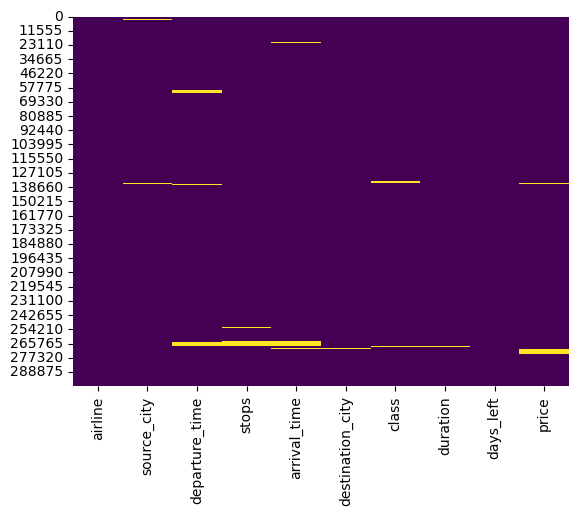

In [10]:
# EDA-1 (Visualizing Heatmap to check Null values in Rows)

sns.heatmap(data_frame.isnull(),cbar=False,cmap='viridis')

In [29]:
# data cleaning-3 (Removing NA values from dataset)
data_frame = data_frame.dropna()

In [30]:
data_frame.shape

(300153, 10)

In [9]:
# Data Cleaning-4

# Convert departure_time column to string and remove leading/trailing white spaces
data_frame['departure_time'] = data_frame['departure_time'].astype(str).str.strip()

# Remove leading and trailing white spaces from the airline column
data_frame['airline'] = data_frame['airline'].str.strip()

In [32]:
# Data Cleaning-5 
data_frame = data_frame[data_frame['duration']>3]

In [33]:
data_frame.shape

(264342, 10)

<AxesSubplot:>

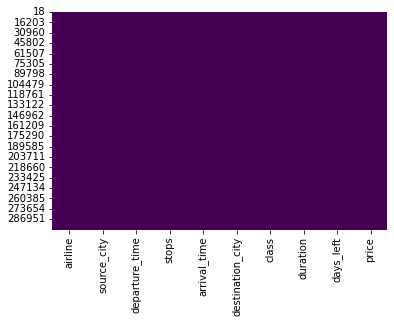

In [41]:
# EDA-2
sns.heatmap(data_frame.isnull(),cbar=False,cmap='viridis')

In [17]:
# Displaying the Duplicate entries
print(data_frame.duplicated().any())

True


In [34]:
# data cleaning-6 ( Removing The Duplicate Values from dataset )
data_frame = data_frame.drop_duplicates()

In [35]:
#Validating 
print(data_frame.duplicated().any())

False


In [36]:
# Data Cleaning-7

# Identify negative values in the DataFrame
negative_prices = data_frame[data_frame['price'] < 0].count()

# Print the count of negative prices
print(negative_prices)

# Remove rows with negative prices
data_frame = data_frame[data_frame['price'] >= 0].dropna()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [37]:
# Data Cleaning-8

# Convert the 'source' and 'destination' columns to categorical data type
data_frame[['source_city', 'destination_city']] = data_frame[['source_city', 'destination_city']].astype('category')

In [38]:
data_frame

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
18,AirAsia,Delhi,Evening,one,Early_Morning,Mumbai,Economy,12.25,1,5949
19,AirAsia,Delhi,Evening,one,Morning,Mumbai,Economy,16.33,1,5949
20,GO_FIRST,Delhi,Early_Morning,one,Evening,Mumbai,Economy,11.75,1,5954
21,GO_FIRST,Delhi,Early_Morning,one,Night,Mumbai,Economy,14.50,1,5954
22,GO_FIRST,Delhi,Evening,one,Morning,Mumbai,Economy,15.67,1,5954
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [23]:
data_frame['airline'].unique()

array(['AirAsia', 'GO_FIRST', 'Air_India', 'Indigo', 'Vistara',
       'SpiceJet'], dtype=object)

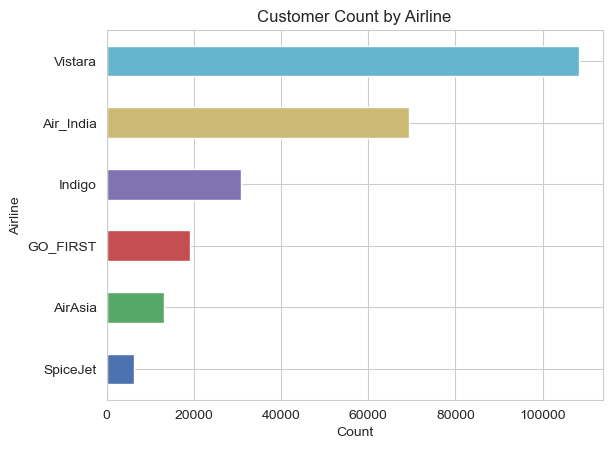

In [24]:
# EDA-3
airline_counts = data_frame['airline'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

# Create horizontal bar chart of airline counts
airline_counts.plot(kind='barh', color=colors)
plt.title("Customer Count by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

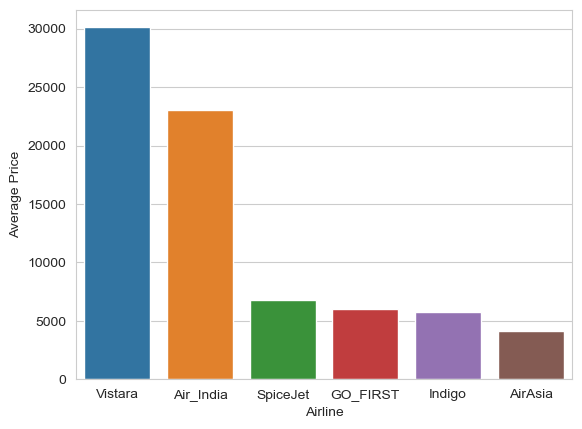

In [25]:
# EDA-4
avg_price = data_frame.groupby('airline')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price',ascending=False)
sns.barplot(x='airline', y='price', data=avg_price)

plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

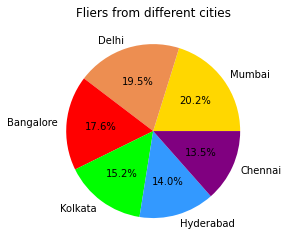

In [19]:
# EDA-5
class_counts = data_frame['source_city'].value_counts()
colors = ['#FFD700', '#ed8e51','#FF0000', '#00FF00','#3399ff','#800080']
class_counts.plot(kind='pie', autopct='%1.1f%%',colors=colors)
plt.title("Fliers from different cities")
plt.ylabel('')
plt.show()

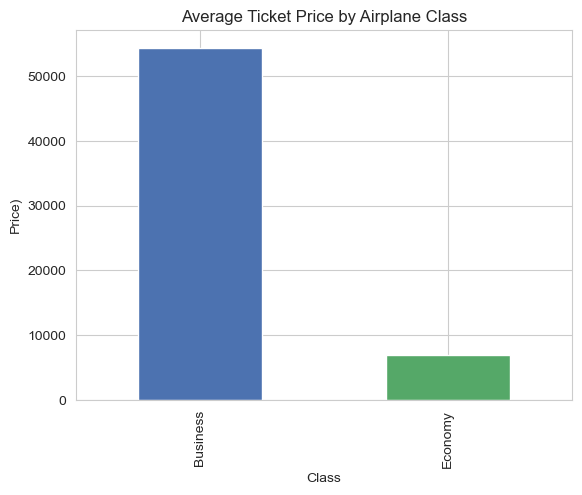

In [27]:
# EDA-6
class_prices = data_frame.groupby('class')['price'].mean()
sns.set_style("whitegrid")
class_prices.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title("Average Ticket Price by Airplane Class")
plt.xlabel("Class")
plt.ylabel("Price)")
plt.show()

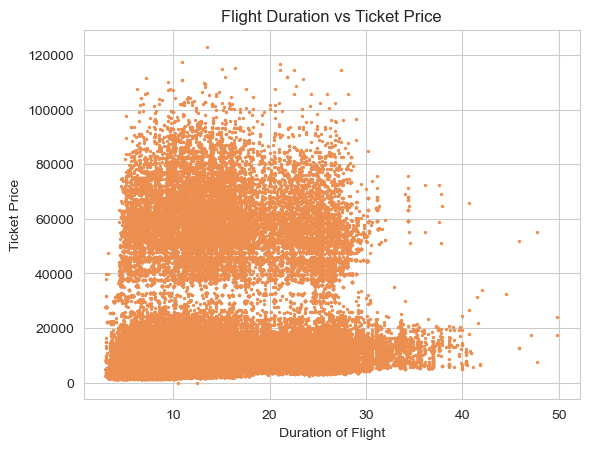

In [28]:
# EDA-7
plt.scatter(data_frame['duration'], data_frame['price'], s=2, color= '#ed8e51')

plt.title("Flight Duration vs Ticket Price")
plt.xlabel("Duration of Flight")
plt.ylabel("Ticket Price")
plt.show()

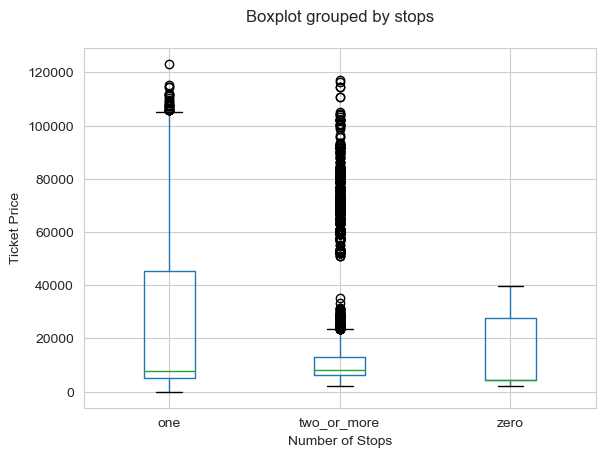

In [29]:
# EDA-8

# Create box plot of number of stops vs ticket price
data_frame.boxplot(column='price', by='stops')

plt.title("")
plt.xlabel("Number of Stops")
plt.ylabel("Ticket Price")
plt.show()

In [39]:
cat_cols = list(data_frame.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 5
Categorical columns:
['airline', 'departure_time', 'stops', 'arrival_time', 'class']


In [40]:
# Data Cleaning-9
te = ce.TargetEncoder(cols=cat_cols)
data_frame = te.fit_transform(data_frame, data_frame['price'])

In [32]:
data_frame

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
18,4135.498940,Delhi,22115.094233,21678.410885,15469.437364,Mumbai,6941.695644,12.25,1.0,5949.0
19,4135.498940,Delhi,22115.094233,21678.410885,22940.086307,Mumbai,6941.695644,16.33,1.0,5949.0
20,5972.779105,Delhi,21052.172676,21678.410885,23120.444731,Mumbai,6941.695644,11.75,1.0,5954.0
21,5972.779105,Delhi,21052.172676,21678.410885,21691.736937,Mumbai,6941.695644,14.50,1.0,5954.0
22,5972.779105,Delhi,22115.094233,21678.410885,22940.086307,Mumbai,6941.695644,15.67,1.0,5954.0
...,...,...,...,...,...,...,...,...,...,...
300148,30113.329582,Chennai,21326.343884,21678.410885,23120.444731,Hyderabad,54397.522612,10.08,49.0,69265.0
300149,30113.329582,Chennai,18015.618298,21678.410885,21691.736937,Hyderabad,54397.522612,10.42,49.0,77105.0
300150,30113.329582,Chennai,21052.172676,21678.410885,21691.736937,Hyderabad,54397.522612,13.83,49.0,79099.0
300151,30113.329582,Chennai,21052.172676,21678.410885,23120.444731,Hyderabad,54397.522612,10.00,49.0,81585.0


In [33]:
features_with_na = [col for col in data_frame.columns if data_frame[col].isna().sum() > 0]

missing_values_df = pd.DataFrame(data_frame[features_with_na].isnull().mean().sort_values(ascending=False), columns=["percentage"])
missing_values_df.head(10)

,percentage


In [34]:
# Data Cleaning-10

# Identify non-numeric columns
non_numeric_cols = data_frame.select_dtypes(exclude='number').columns

# Create a new DataFrame with numeric columns only
data_numeric = data_frame.drop(columns=non_numeric_cols)

# Apply MinMaxScaler to numeric columns only
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)

# Combine scaled numeric columns with non-numeric columns
data_final = pd.concat([data_scaled, data_frame[non_numeric_cols]], axis=1)

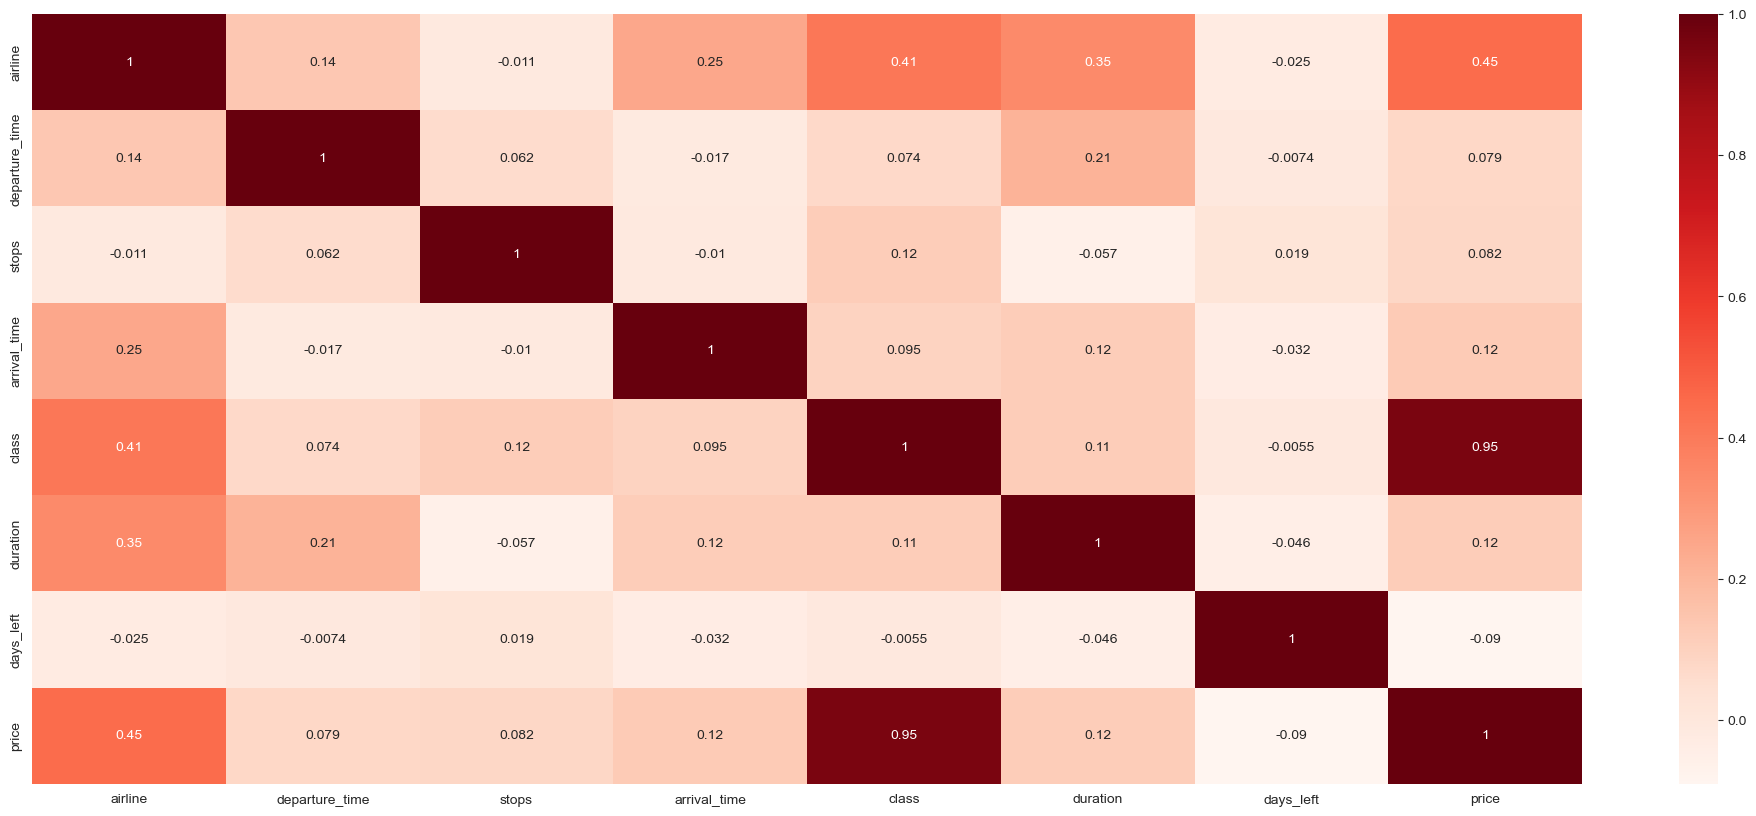

In [35]:
# EDA-9

plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

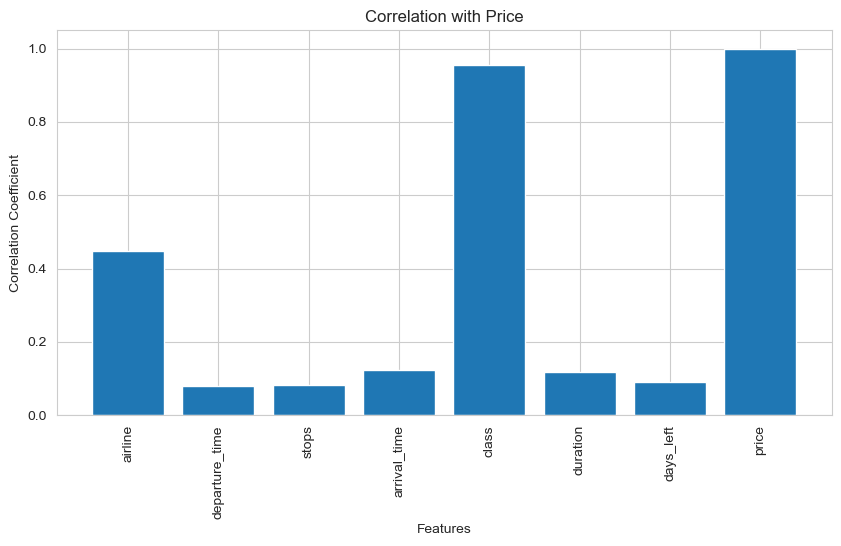

In [36]:
# EDA-10

#Correlation with target variable price
cor_target = abs(cor["price"])

relevant_features = cor_target
relevant_features 

plt.figure(figsize=(10,5))
plt.bar(x=cor_target.index, height=cor_target.values)
plt.xticks(rotation=90)
plt.title("Correlation with Price")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()